In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [7]:

class AutoEncoder(nn.Module):
		def __init__(self, input_dim, hidden_dim, latent_dim):
				super(AutoEncoder, self).__init__()
				# Encoder
				self.encoder = nn.Sequential(
						nn.Linear(input_dim, hidden_dim),
						nn.ReLU(),
						nn.Linear(hidden_dim, latent_dim)
				)
				# Decoder
				self.decoder = nn.Sequential(
						nn.Linear(latent_dim, hidden_dim),
						nn.ReLU(),
						nn.Linear(hidden_dim, input_dim),
						nn.Sigmoid()  # Assuming input is normalized between 0 and 1
				)

		def forward(self, x):
				latent = self.encoder(x)
				reconstructed = self.decoder(latent)
				return reconstructed

In [8]:
from IPython.display import clear_output, display, HTML

In [52]:
autoencoder=AutoEncoder(input_dim=784, hidden_dim=256, latent_dim=64)

In [61]:
for i in range(100):
		input_data=torch.randn(1,784)
		output_data=autoencoder(input_data)
		loss=F.mse_loss(output_data, input_data)
		loss.backward()
		with torch.no_grad():
			for param in autoencoder.parameters():
					param.data -= param.grad * 0.01
					param.grad.zero_()
		clear_output()
		print(loss)
		

tensor(1.2423, grad_fn=<MseLossBackward0>)


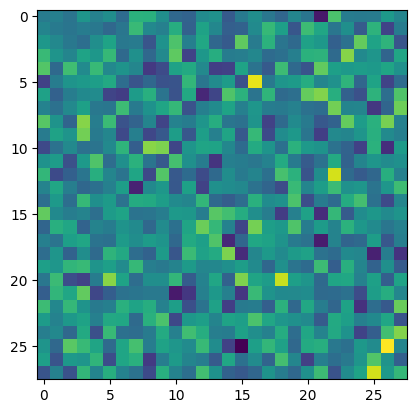

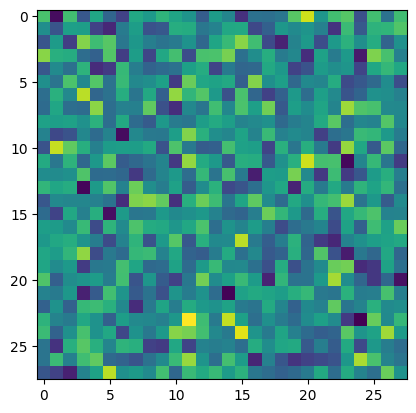

In [62]:
input_data=torch.randn(1,784)
output_data=autoencoder(input_data)
plt.subplots()[1].imshow(input_data.detach().view((28,28)))
plt.subplots()[1].imshow(output_data.detach().view((28,28)))